In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.insert(0, '../')
from bivariate_copula import *

In [2]:
sns.set()

params = {
    'font.size': 14,
    'figure.figsize': (13, 9),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

## Standard bivariate copulae

* Gaussian:
  * $\theta$ is simply the correlation between the two dimensions. 
  * No tail dependance at all.
  
* Clayton:
  * $\theta \to 0$ : indenpendant coupling,
  * $\theta \to +\infty$ : full dependance coupling,
  * Left-tail dependance: $X$ and $Y$ are becoming dependant for asymptotically low values,
  * Right-tail independance: $X$ and $Y$ are becoming independant for asymptotically high values.
  
* Gumbel:
  * $\theta \to 1$ : indenpendant coupling,
  * $\theta \to +\infty$ : full dependance coupling,
  * Left-tail independance: $X$ and $Y$ are becoming independant for asymptotically low values,
  * Right-tail dependance: $X$ and $Y$ are becoming dependant for asymptotically high values.

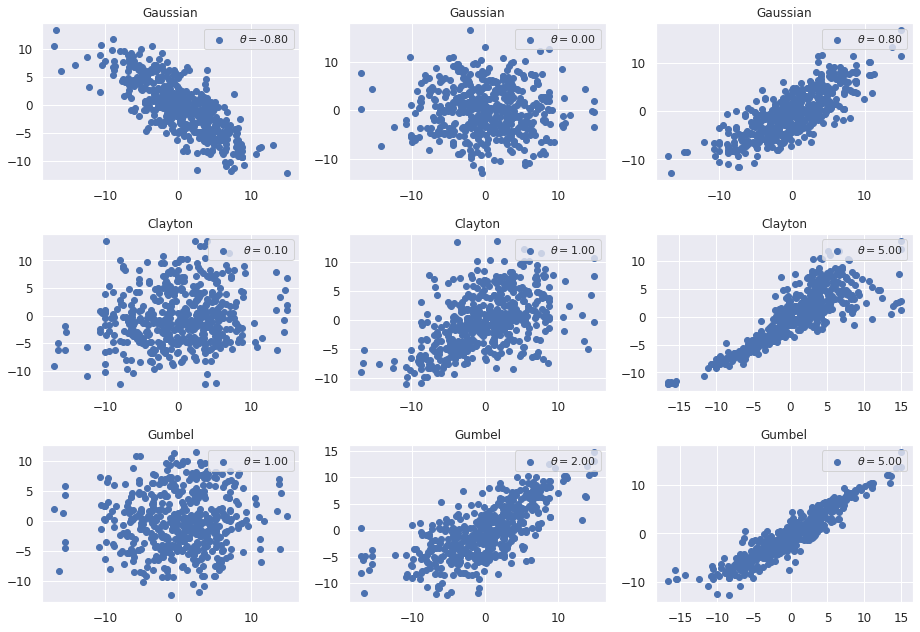

In [3]:
fig, axess = plt.subplots(nrows=3, ncols=3)

X = np.random.normal(0, 5, size=500)
Y = np.random.normal(0, 5, size=500)

copulas = [
    GaussianCopula(X, Y),
    ClaytonCopula(X, Y),
    GumbelCopula(X, Y),
]

thetas = [
    [-0.8, 0.0, 0.8],
    [0.1, 1.0, 5.0],
    [1.0, 2.0, 5.0],
]

n_sim = 500

for i, axes in enumerate(axess):
    copula = copulas[i]
    for j, ax in enumerate(axes):
        theta = thetas[i][j]
        copula.theta = theta
        X_sim, Y_sim = copula.simulate(n_sim)
        ax.scatter(X_sim, Y_sim, label=r'$\theta=${:.2f}'.format(theta))
        ax.legend(loc='upper right')
        ax.title.set_text(copula.name)

plt.tight_layout()

plt.show()